In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
def get_tps(input_file, output_file):

  # Define the regular expression pattern
  pattern = r"\x1b\[0m\x1b\[38;5;8m\[\x1b\[0m(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{9})Z \x1b\[0m\x1b\[32mINFO \x1b\[0m solana_bench_tps::perf_utils\x1b\[0m\x1b\[38;5;8m\]\x1b\[0m Sampler  (\d+\.\d{2}) TPS, Transactions:  \d+, Total transactions: \d+ over \d+ s"


  # Open the input file and read its contents
  with open(input_file, "r") as file:
      lines = file.readlines()

  # Initialize lists to store extracted data
  dates = []
  times = []
  tps_values = []

  # Iterate over each line and match the pattern
  for line in lines:
      match = re.search(pattern, line)
      if match:
          date = match.group(1)[:10]
          time = match.group(1)[11:]
          tps = match.group(2)

          dates.append(date)
          times.append(time)
          tps_values.append(tps)

  # Create a DataFrame from the extracted data
  data = {"date": dates, "time": times, "tps": tps_values}
  df = pd.DataFrame(data)

  # Save the DataFrame to a CSV file
  df.to_csv(output_file)  # Include index column

  print(df.head())

  return df

In [21]:
def print_describe(df):
  # Convert the "tps" column to float
  df["tps"] = df["tps"].astype(float)

  # Now you can use the .describe() function
  print(df["tps"].describe())

In [22]:

def plot_tps(df, plot_output):
    # Calculate average TPS
    average_tps = df["tps"].mean()

    # Find the index of maximum and minimum TPS values
    max_tps_index = df["tps"].idxmax()
    min_tps_index = df["tps"].idxmin()

    # Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["tps"], linestyle='-', color='b', label='TPS')
    plt.axhline(y=average_tps, color='grey', linestyle='--', label='Average TPS')
    plt.scatter([max_tps_index, min_tps_index], [df["tps"][max_tps_index], df["tps"][min_tps_index]], marker='x', color='red', label='Max/Min Points')

    # Annotate TPS values next to each red 'x' marker
    for index, tps_value in zip([max_tps_index, min_tps_index], [df["tps"][max_tps_index], df["tps"][min_tps_index]]):
        plt.annotate(f"{tps_value:.2f}", (index, tps_value), textcoords="offset points", xytext=(10,0), ha='left')

    # Annotate average TPS value at the bottom left corner
    plt.annotate(f"Average TPS: {average_tps:.2f}", (0, 12000), textcoords="offset points", xytext=(10, 10), fontsize=12, color='black')

    plt.xlabel("Sampler")
    plt.ylabel("TPS")
    plt.title("TPS over Sampler")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.savefig(plot_output)

    # Show the plot
    plt.show()


         date                time       tps
0  2023-08-12  20:51:09.613492000  19290.30
1  2023-08-12  20:51:10.617778000  20820.58
2  2023-08-12  20:51:11.621577000  17039.68
3  2023-08-12  20:51:12.622539000  21833.25
4  2023-08-12  20:51:13.624353000  20990.46
count       59.000000
mean     19240.405254
std       3310.129175
min      11385.440000
25%      17988.080000
50%      20385.540000
75%      21906.860000
max      23601.180000
Name: tps, dtype: float64


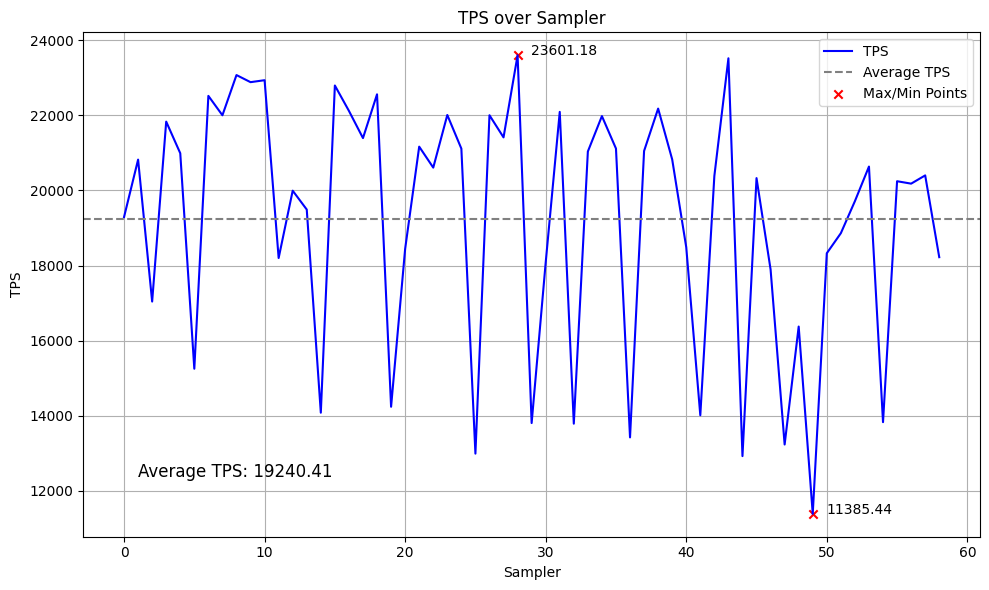

In [23]:
df_tps = get_tps("output_tps.txt", "output_tps.csv")
print_describe(df_tps)
plot_tps(df_tps, "tps_plot.png")

         date                time       tps
0  2023-08-13  00:35:41.440537000  15982.84
1  2023-08-13  00:35:42.441753000  30557.77
2  2023-08-13  00:35:43.442721000  25091.99
3  2023-08-13  00:35:44.447181000  30529.42
4  2023-08-13  00:35:45.452399000  33907.37
count       51.000000
mean     23949.460588
std       6361.155589
min      13331.670000
25%      19470.055000
50%      23674.670000
75%      27939.095000
max      41200.850000
Name: tps, dtype: float64


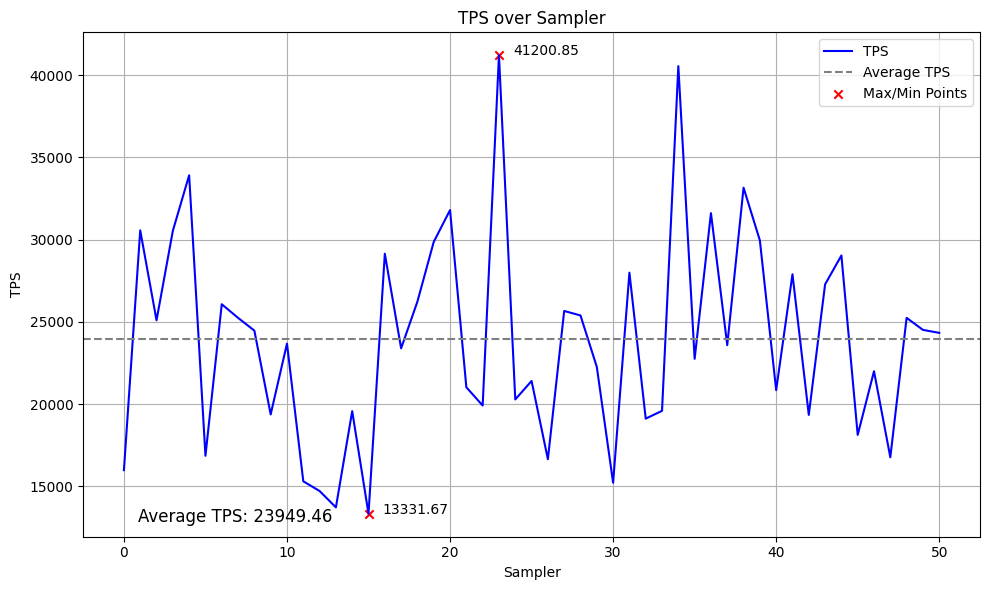

In [24]:
df_tps = get_tps("output_tx_500.txt", "output_tps_500.csv")
print_describe(df_tps)
plot_tps(df_tps, "tps_plot.png")